In [2]:
%matplotlib inline

In [33]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap

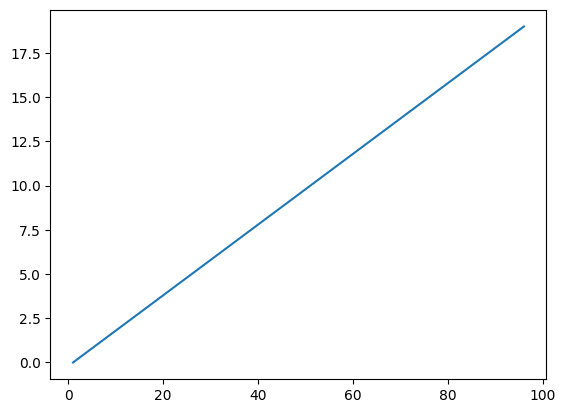

In [34]:
data_x1 = range(1, 100, 5)
data_y1 = range(0, 20)
plt.plot(data_x1, data_y1)
plt.show()

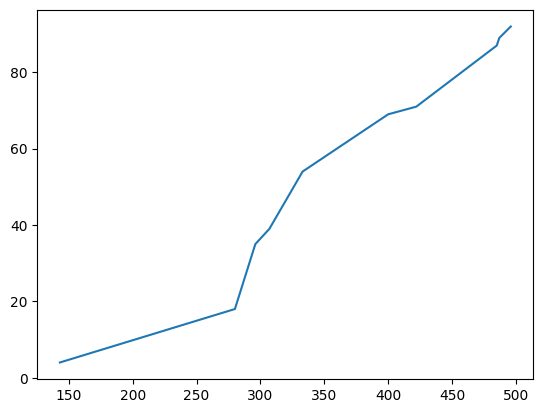

In [35]:
data_x2 = random.sample(range(500), 10)
data_y2 = random.sample(range(100), 10)
data_x2.sort()
data_y2.sort()
plt.plot(data_x2, data_y2)
plt.show()

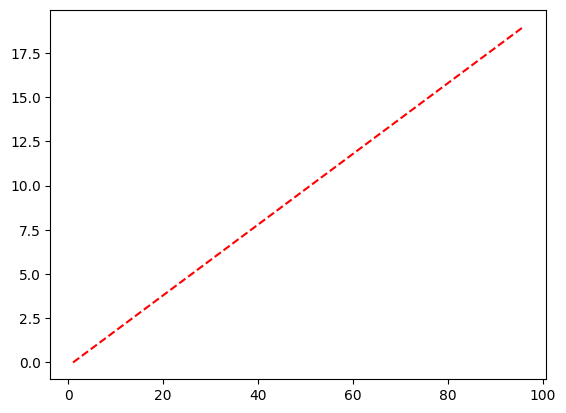

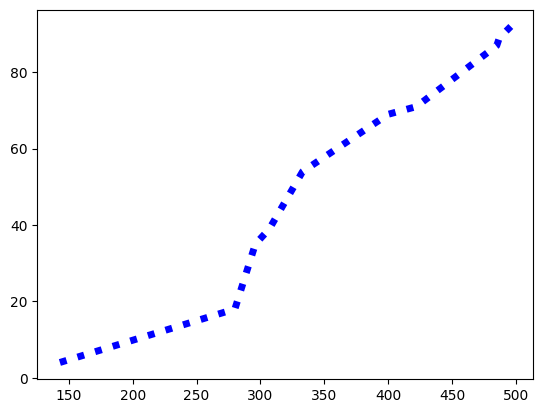

In [36]:
plt.plot(data_x1, data_y1, color="red", linestyle="dashed")
plt.figure()
plt.plot(data_x2, data_y2, color="blue", linestyle="dotted", linewidth=5)
plt.show()

In [37]:
%ls

bus_stops.csv  lesson3_part1.ipynb  lesson_part2.ipynb  venv/
lesson1.ipynb  lesson3_part2.ipynb  metro_stops.csv     WITS-Partner_2015.xls
lesson2.ipynb  lesson4.ipynb        requirements.txt    WITS-Partner_2016.xls


In [38]:
stations = pd.read_csv(open("bus_stops.csv", "r", encoding="cp1251"), sep=";")

In [39]:
stations.head()

,ID,Name,Longitude_WGS84,Latitude_WGS84,AdmArea,District,RouteNumbers,StationName,Direction,Pavilion,OperatingOrgName,EntryState,global_id,PlaceDescription,Works,geodata_center,geoarea
0,Локальный идентификатор,Наименование,Долгота в WGS-84,Широта в WGS-84,Административный округ,Район,Маршруты,Название остановки,Направление,Наличие павильона,"Балансодержатель павильона ожидания (пилона, т...",Состояние записи,global_id,Описание места расположения объекта,Работы,geodata_center,geoarea
1,7,"«Дербеневская наб.», 3-й Дербеневский переулок...",37.6551636,55.72566817,Южный административный округ,Даниловский район,А913; АС932,Дербеневская наб.,от центра,да,ГУП «Мосгортранс»,активна,889076457,"Дербеневская ул., д.1",NaN,NaN,NaN
2,11,"«Наб. Тараса Шевченко», набережная Тараса Шевч...",37.57227413,55.74967848,Западный административный округ,район Дорогомилово,А205; А622,Наб. Тараса Шевченко,в центр,нет,NaN,активна,889076459,"Кутузовский просп., д.1",NaN,NaN,NaN
3,27,"«Кардиоцентр», 3-я Черепковская улица (в центр...",37.37550932,55.7572642,Западный административный округ,район Кунцево,А660; А798; А816,Кардиоцентр,в центр,да,ГУП «Мосгортранс»,активна,889076461,"3-я Черепковская ул., д.15А",NaN,NaN,NaN
4,33,"«Новосущёвская ул.», улица Сущёвский Вал (в це...",37.60337594,55.79289095,Северо-Восточный административный округ,район Марьина Роща,А126; Ас484; Ат18; Ат42,Новосущёвская ул.,в центр,да,ЗАО «Валль-СНГ»,активна,889076463,"ул. Сущёвский Вал, д.25",NaN,NaN,NaN


In [40]:
pavilion_count = stations.groupby(["Pavilion"]).size()

In [41]:
type(pavilion_count)

pandas.core.series.Series

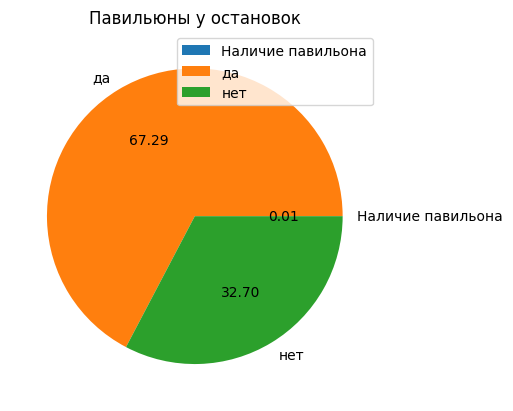

In [42]:
plt.pie(pavilion_count, labels=pavilion_count.index, autopct='%.2f')
plt.title("Павильюны у остановок")
plt.legend()
plt.show()

In [43]:
admarea_count = stations.groupby(["AdmArea"]).size()

In [44]:
admarea_count

AdmArea
Административный округ                        1
Восточный административный округ           1411
Западный административный округ            1264
Зеленоградский административный округ       249
Новомосковский административный округ       695
Северный административный округ            1074
Северо-Восточный административный округ    1212
Северо-Западный административный округ      869
Троицкий административный округ             452
Центральный административный округ         1022
Юго-Восточный административный округ       1236
Юго-Западный административный округ        1092
Южный административный округ               1401
dtype: int64

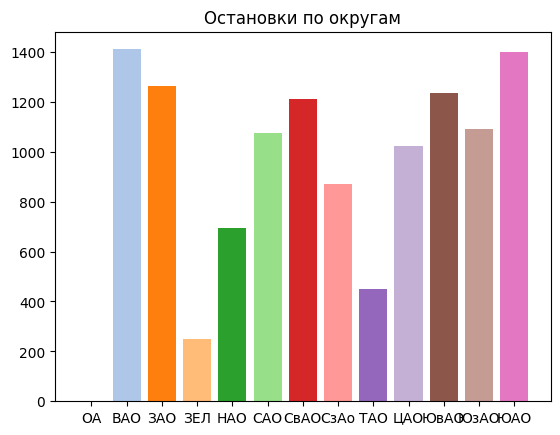

In [51]:
labels = ["ОА", "ВАО", "ЗАО", "ЗЕЛ", "НАО", "САО", "СвАО", "СзАо", "ТАО", "ЦАО", "ЮвАО", "ЮзАО", "ЮАО"]
cmap = get_cmap('tab20')
colors = [cmap(i) for i in range(len(labels))]
plt.bar(labels, admarea_count, color=colors)
plt.title("Остановки по округам")
plt.show()